In [1]:
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 
from sklearn import datasets 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
data = datasets.load_iris()

In [3]:
labels = data.target_names
print(labels)

['setosa' 'versicolor' 'virginica']


In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# Unpacking the data.
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [6]:
# Fitting the RandomForestClassifier.
clf = RandomForestClassifier(max_depth=2)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [7]:
# classification report
report = classification_report(y_test, y_pred, target_names=labels)
print(report)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       0.87      1.00      0.93        13
  virginica       1.00      0.85      0.92        13

avg / total       0.95      0.95      0.95        38



In [8]:
# Accuracy
print(accuracy_score(y_pred,y_test))

0.9473684210526315


In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12  0  0]
 [ 0 13  0]
 [ 0  2 11]]


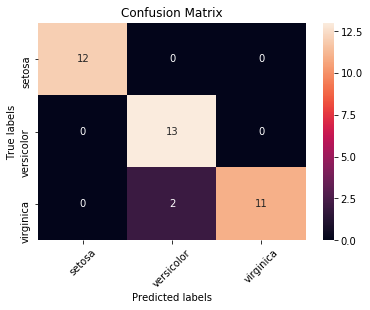

In [10]:
# Plotting the confusion matrix on seaborn
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels, rotation=45)
ax.yaxis.set_ticklabels(labels)

plt.show()